# CS 458 PROJECT REPORT

> Cameron Howard

> CS 458 Project Report

> Project Group 6

> 12/12/2019

# Team Members (% Contribution):
## Cameron Howard (33%)
## Ian Vanderhoff (34%)
## Chris Parks (33%)




# Introduction

This is the final project report for group 6 of CS 458. The following report details a literature review for both of the tasks completed (Task 1 and Task3), then each task is broken down into the parts each team member completed. Represented in each part will be: The team member who coded it, the approach taken, the code, and finally the conclusion. At the end of the report will be a list of codes/documents submitted. The tasks completed for this project were:

### Task 1: Document Classification.

For this task the data provided had to be formatted in a way that could be used by several different classifiers. Then each team member attempted to classify the data using hand-selected classifiers. Detailed below, it can be seen how each classifier chosen performed, as well as which ones were better suited for the data provided.

### Task 3: Exploring Used Auto Purchase Dataset

For this task a large and rather unruly dataset was provided, and several methods were employed in an attempt to extrapolate information or patterns. Again, the first step was formatting the data in a way that would work with the libraries used. Next, each team member attempted a different approach at gleaning information from the dataset. Detailed more in the Task 3 section, each approach taken as well as the results can be seen.

# Literature Review: Task 1

Task 1 asks that different classification techniques are explored, and that parameters within each of them are further explored in order to determine the best way to classify the given data. Some other works that use multiple classification techniques in order to glean information from data are "Improved Study of Heart Disease Prediction System using Data Mining Classification Techniques" [1].

In this article, three of the classifications used are decision trees, neural networks, and naive Bayes. Their conclusion was that the artificial neural network had the highest success rate in correctly classifying their data. Task 1 of this project expand upon all three of these implementations in Task 1 in order to test their efficiency on the given dataset.

Another article that utilizes multiple techniques of classification is "Comparative Study of Data Mining Classification Methods in Cardiovascular Disease Prediction" [2].

This article uses RIPPER, decision tree, artificial neural network, and support vector machines. The conclusion of their study is that the support vector machine predicted with the least error rate and the highest accuracy. While Task 1 may not use all of the techniques they do, one that will be implemented is the support vector machine.

# Literature Review: Task 3

Task 3 asks that a large dataset be manipulated in such a way that patterns or correlations can be gleaned from it. There are many ways to attempt such a monumental task, so to help narrow down the daunting task some research was done and one paper found discusses the Apriori approach to data mining in "Aided Analysis for Quality Function Deployment With an Apriori-Based Data Mining Approach" [3]. In this paper, the authors discuss how the Apriori algorithm can be employed to generate useful association rules from datasets. This method will be implemented in Task 3 as one of the possible ways to extrapolate information from the given dataset.

One other method discussed in a scholarly journal is linear regression in "On the Accuracy of Linear Regression Routines in Some Data Mining Packages" [4]. Linear regression demonstrates correlations between two continuous attributes within a dataset. This article discussed different packages that allow this powerful tool to be implemented. This project is implemented in Python and will likely use the Python regression tool discussed in the article.



# Report Preprocessing Code
**Run this code before any other to access the github resources.**

In [1]:
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/task1_format_data.py
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/task3_format_data.py
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/test_data_sample.txt
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/test_label_sample.txt
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/label_training.txt
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/test_sample.xlsx
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/testing.txt
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/training.txt
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/UsedAutoRELEVATEfirst10000-noLatLong.csv
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/data_nochanges.csv
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/q3_results_18.txt
!wget https://raw.githubusercontent.com/camhoward93/data-mining-intro/master/q3_results_23.txt

--2019-12-13 00:59:03--  https://raw.githubusercontent.com/delphin7/data_mining_proj_format_data/master/task1_format_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3505 (3.4K) [text/plain]
Saving to: ‘task1_format_data.py.4’

task1_format_data.p 100%[===================>]   3.42K  --.-KB/s    in 0s      

2019-12-13 00:59:03 (64.5 MB/s) - ‘task1_format_data.py.4’ saved [3505/3505]

--2019-12-13 00:59:04--  https://raw.githubusercontent.com/delphin7/data_mining_proj_format_data/master/task3_format_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting respon

# Task 1: Document Classification

### Purpose:

The purpose of this task is to use several different classifiers in order to understand them and conclude which is best suited for the given data. The given training data is used to train each classifier, then the testing data is sent through the classifiers and labeled by each of them. Finally, the accuracy of each classifier’s labeling is determined by comparing the generated labels to a given file of the true labels of the data. The accuracy scores of each classifier used are presented throughout this section.

## Data Preprocessing
### Coding Implemented by Team Member: Ian Vanderhoff

The data provided (training data file and testing data file) needed to be formatted in such a way that they could be utilized by several different classifiers from the scikit-learn library. The Pandas Python library was used to format the training and testing data into data frames that could be used by the fit functions of different classifiers.

However, simply having the data in a data frame wasn’t sufficient as there were still missing values and the two data frames needed to be the same shape in order for the classifiers to utilize them. So, the missing values were replaced with zero values so as to not skew the data. Next, to get both data frames to be the same shape while also reducing the number of useless data (zero filled columns), the union of the attribute IDs for both data sets was taken and zero filled columns were only added for IDs that were in the union and not the dataset.

With the data preprocessed this way, the data frames could now be used by a variety of classifiers in the scikit-learn library, and the number of non-informative data within the set was reduced.

Note: See task1_format_data file for the functions used to format the data (implemented by Ian Vanderhoff).

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

import task1_format_data as fd1

# Importing and pre-processing the data into dataframes that are formatted correctly.
X_TRAIN_PATH = "/content/training.txt"
Y_TRAIN_PATH = "/content/label_training.txt"

X_TEST_PATH = "/content/test_data_sample.txt"
Y_TEST_PATH = "/content/test_label_sample.txt"

# Send the data to dataframes
x_train = fd1.data_txt_to_wide_df(X_TRAIN_PATH)
y_train = fd1.label_txt_to_df(Y_TRAIN_PATH)

x_test = fd1.data_txt_to_wide_df(X_TEST_PATH)
y_test = fd1.label_txt_to_df(Y_TEST_PATH)

# Union and add zero columns to get the correct shape
col_id_union = fd1.get_data_attribute_union(x_train, x_test)

x_train = fd1.add_zero_cols_to_df(x_train, col_id_union)
x_test = fd1.add_zero_cols_to_df(x_test, col_id_union)

## Decision Tree Classification
### Coding Implemented by Team Member: Ian Vanderhoff

**Approach**

For the decision tree classifier, multiple trees were used with varying parameters. This is a brute force method used simply to play with the tweaking of the tree’s most important values in order to discern what will classify the data with the highest accuracy. The parameters chosen to be played with were: the maximum depth of the tree and the maximum number of features. The number of features tested were the default, the sqrt, and the log base 2.

By implementing this in a nested for loop, the trees were tested with their feature setting changed, and for each of those trees with different features a range of maximum depths was tested. The accuracy of each tree was stored in a list so that they could be plotted to demonstrate their success.


In [0]:
# Initialize Variables
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
depth = clf.get_depth()
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, y_pred)

max_depth_accuracy = [[], [], []]

# Loop over each feature setting, then over all depths in the range
# for each iteration, fit to the decision tree classifier, predict, and save accuracy
max_depth_options = list(range(2, 61))
max_features_options = [None, 'sqrt', 'log2']
for i, feature in enumerate(max_features_options):
    for depth in max_depth_options:
        clf = DecisionTreeClassifier(max_depth=depth, max_features=feature)
        clf = clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test.values, y_pred)
        max_depth_accuracy[i].append(accuracy)

The following code plots the accuracy scores of each tree against their max depths used from the range of 2 - 61.

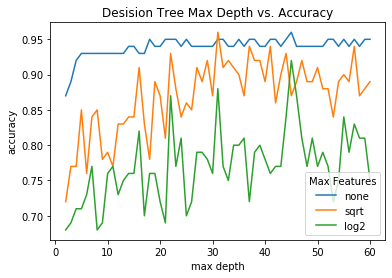

In [4]:
# Plot the trees' accuracies
plt.plot(np.asarray(max_depth_options), np.asarray(max_depth_accuracy[0]), label='none')
plt.plot(np.asarray(max_depth_options), np.asarray(max_depth_accuracy[1]), label='sqrt')
plt.plot(np.asarray(max_depth_options), np.asarray(max_depth_accuracy[2]), label='log2')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title("Desision Tree Max Depth vs. Accuracy")
plt.legend(title='Max Features')
plt.show('decision_tree.png')

**Conclusion**

The accuracy for each tree is not too bad. They all range from around 70 to the mid 90's in percentage of accurate labeling. The decision tree with the default max features setting performed the best, and can be clearly seen increasing in performance during the runs with very low depths. Therefore, the conclusion is that the tree with default max feature settings performs the best, but should be ran with at least a meax depth of about 10.

## Passive Aggressive Classification
### Coding Implemented by Team Member: Cameron Howard

**Approach**

The Passive Aggressive classifier is ill-suited for our assignment, but it was implemented to investigate what kind of results it might have. The Passive Aggressive Classifier is typically used on large streams of data. It takes in a section of the stream and uses it to update its classifier, then throws that section out (and cannot retrieve it later). This would be used on a massive stream of data such as all of the post on Facebook going out throughout the day, or all the tweets on Twitter. However, since this project is just a simple classification over constant values in a file, this classification produces interesting (and not very dependable) results.
 
The parameters being tested are the default case, the fit intercept case, and the 5 times the iterations being done case.

Note: The np.ravel() function had to be used to get the correct shape for the fit function of the classifier.


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier

# Initialize Variables
accuracy_scores = [[], [], []]

num_iterations = list(range(10))

# Loop num_iterations times performing the classification over the three types
# of classifiers each time and save the accuracy scores for plotting
for _ in num_iterations:
    clf = PassiveAggressiveClassifier()
    clf = clf.fit(x_train, np.ravel(y_train))
    prediction = clf.predict(x_test)
    accuracy = accuracy_score(y_test.values, prediction)
    accuracy_scores[0].append(accuracy)
    # print("PA (default) Accuracy: ", accuracy)

    clf = PassiveAggressiveClassifier(fit_intercept=True)
    clf = clf.fit(x_train, np.ravel(y_train))
    prediction = clf.predict(x_test)
    accuracy = accuracy_score(y_test.values, prediction)
    accuracy_scores[1].append(accuracy)
    # print("PA (intercept) Accuracy: ", accuracy)

    clf = PassiveAggressiveClassifier(max_iter=5000)
    clf = clf.fit(x_train, np.ravel(y_train))
    prediction = clf.predict(x_test)
    accuracy = accuracy_score(y_test.values, prediction)
    accuracy_scores[2].append(accuracy)
    # print("PA (five times iterations) Accuracy: ", accuracy)


The plot shows each different parameter's accuracy as they ran a number of iterations over the same data.

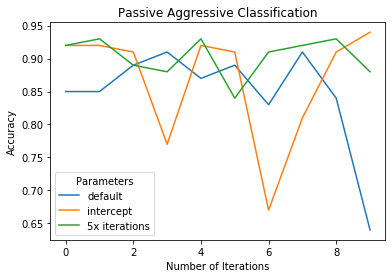

In [6]:
# Plot the accuracy arrays
plt.plot(np.asarray(num_iterations), np.asarray(accuracy_scores[0]), label='default')
plt.plot(np.asarray(num_iterations), np.asarray(accuracy_scores[1]), label='intercept')
plt.plot(np.asarray(num_iterations), np.asarray(accuracy_scores[2]), label='5x iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title("Passive Aggressive Classification")
plt.legend(title='Parameters')
plt.show()

**Conclusion**

As expected, this classifier is not appropriate for our type of data. However, the results of its classifications are interesting to say the least. Sometimes drops can be seen as low as 49% accuracy. Although each iteration over the data is inconsistent, some of the classifications are close to 100% accuracy. However, the varying results make this a classifier to be avoided for the means of our project.

## Naive Bayes Classification
### Coding Implemented by Team Member: Cameron Howard

**Approach**

The Naive Bayes Classifier uses an underlying Naive Bayes algorithm to classify the data. None of the Naive Bayes algorithms are particularly suited to this data set's limited classification, but they are all reportedly good classifiers, so the output was expected to have high accuracy. The testing parameters used were four different underlying algorithms:
 
Gaussian: Assumes the likelihood of the features is Gaussian.
 
Multinomial: Used for multinomially distributed data, usually used in text classification.
 
Complement: Derived from Multinomial, meant for imbalanced data sets. Also usually used for text classification.
 
Bernoulli: Used on data that follows Bernoulli distributions. 
 
Note: The np.ravel() function had to be used to get the correct shape for the fit function of the classifier.


In [7]:
from sklearn.metrics import accuracy_score
import sklearn.naive_bayes as nb

# Initialize Variables
accuracy_scores = []

# Gaussian Classifier
clf = nb.GaussianNB()
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Gaussian Naive Bayes Accuracy: ", accuracy)

# Multinomial Classifier
clf = nb.MultinomialNB()
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Multinomial Naive Bayes Accuracy: ", accuracy)

# Complement Classifier
clf = nb.ComplementNB()
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Complement Naive Bayes Accuracy: ", accuracy)

# Bernoulli Classifier
clf = nb.BernoulliNB()
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Bernoulli Naive Bayes Accuracy: ", accuracy)


Gaussian Naive Bayes Accuracy:  0.98
Multinomial Naive Bayes Accuracy:  0.95
Complement Naive Bayes Accuracy:  0.95
Bernoulli Naive Bayes Accuracy:  0.98


The plot is a horizontal bar graph with each of the classifiers on the y-axis and the accuracy on the x-axis.

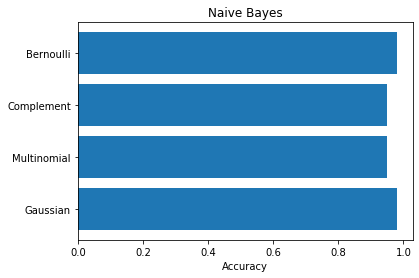

In [8]:
# Plot the accuracies
bars = ('Gaussian', 'Multinomial', 'Complement', 'Bernoulli')
y_pos = np.arange(len(bars))

plt.barh(y_pos, accuracy_scores, align='center')
plt.yticks(y_pos, bars)
plt.xlabel('Accuracy')
plt.title('Naive Bayes')

plt.show()

**Conclusion**

None of the Naive Bayes algorithms are particularly suited to this data set's limited classification. However, they all perform relatively well ranging from 95% - 98% accuracy. It is worth noting that none of them were able to reach 100% accuracy.


## Support Vector Machine
### Coding Implemented by Team Member: Cameron Howard

**Approach**

The Support Vector Machine (SVM) runs the data through an underlying kernel algorithm in order to classify it. This code can take about 20 minutes to fully run as the SVMs are complex. The loop tests different kernel options (which are just the algorithms that the SVM is using to determine its classifications) with different gamma options (which are just kernel coefficients [Auto = (1/n) and Scale = (1/(n*variance of x))]. The kernels used are rbf (radial basis function [this is the default option]), polynomial, sigmoid, and linear. Linear gets tested after the loop to avoid using unnecessary processing time on parameters it would just ignore. Polynomial gets tested using differing degrees (1-4).

Note: The np.ravel() function had to be used to get the correct shape for the fit function of the classifier.


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Initialize Variables
accuracy_scores = []
kernel_opts = ['rbf', 'poly', 'sigmoid']  # cases
gamma_opts = ['auto', 'scale']            # used by all 3 cases
degree_opts = list(range(1, 5))           # poly, ignored by others

# Perform loops and save accuracy scores and print accuracy
# Loop over the kernel options
for k in kernel_opts:
    # Loop over the gamma options
    for g in gamma_opts:
        # If polynomial kernel, loop over degree options
        if k == 'poly':
            for d in degree_opts:
                clf = SVC(kernel=k, gamma=g, degree=d)
                clf = clf.fit(x_train, np.ravel(y_train))
                prediction = clf.predict(x_test)
                accuracy = accuracy_score(y_test.values, prediction)
                accuracy_scores.append(accuracy)
                print("Kernel: ", k, "; Gamma: ", g, "; Degree: ", d, "; Accuracy: ", accuracy)
        else:
            clf = SVC(kernel=k, gamma=g)
            clf = clf.fit(x_train, np.ravel(y_train))
            prediction = clf.predict(x_test)
            accuracy = accuracy_score(y_test.values, prediction)
            accuracy_scores.append(accuracy)
            print("Kernel: ", k, "; Gamma: ", g, "; Accuracy: ", accuracy)
            
# Perform the final kernel (Linear)
clf = SVC(kernel='linear')
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Kernel: ", "linear", "; Gamma: ", "Auto", "; Accuracy: ", accuracy)

Kernel:  rbf ; Gamma:  auto ; Accuracy:  0.69
Kernel:  rbf ; Gamma:  scale ; Accuracy:  0.7
Kernel:  poly ; Gamma:  auto ; Degree:  1 ; Accuracy:  0.72
Kernel:  poly ; Gamma:  auto ; Degree:  2 ; Accuracy:  0.8
Kernel:  poly ; Gamma:  auto ; Degree:  3 ; Accuracy:  0.73
Kernel:  poly ; Gamma:  auto ; Degree:  4 ; Accuracy:  0.69
Kernel:  poly ; Gamma:  scale ; Degree:  1 ; Accuracy:  0.7
Kernel:  poly ; Gamma:  scale ; Degree:  2 ; Accuracy:  0.7
Kernel:  poly ; Gamma:  scale ; Degree:  3 ; Accuracy:  0.7
Kernel:  poly ; Gamma:  scale ; Degree:  4 ; Accuracy:  0.7
Kernel:  sigmoid ; Gamma:  auto ; Accuracy:  0.69
Kernel:  sigmoid ; Gamma:  scale ; Accuracy:  0.7
Kernel:  linear ; Gamma:  Auto ; Accuracy:  1.0


The results are compiled into a horizontal bar graph that shows accuracy on the x-axis and each tested kernel with its parameters on the y-axis.

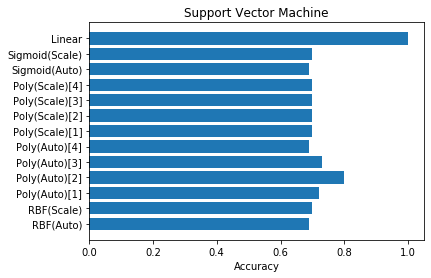

In [10]:
# Plot the accuracies of the differing SVMs
bars = ('RBF(Auto)', 'RBF(Scale)', 'Poly(Auto)[1]', 'Poly(Auto)[2]', 'Poly(Auto)[3]', 'Poly(Auto)[4]',
        'Poly(Scale)[1]', 'Poly(Scale)[2]', 'Poly(Scale)[3]', 'Poly(Scale)[4]', 'Sigmoid(Auto)', 'Sigmoid(Scale)',
        'Linear')
y_pos = np.arange(len(bars))

plt.barh(y_pos, accuracy_scores, align='center')
plt.yticks(y_pos, bars)
plt.xlabel('Accuracy')
plt.title('Support Vector Machine')

plt.show()


**Conclusion**

Linear was by far the best result with 100% accuracy. The rest hovered around 70% while polynomial of degree 2 with auto gamma got to 80%.
 
As a whole, the Linear kernel SVM is the best classifier for this task.


## Remaining Classifiers Preprocessing Code
### Coding Implemented by Team Member: Chris Parks
**Run this code to reduce the time the next few classifiers take to complete.**

In [11]:
#Chris Parks
#Variable to toggle whether or not to calculate new data for the
#Nearest Neighbor, Artificial Neural Network, and Ensemble Method Classifiers

#These classifiers can take a long time to run, so to save time,
#set to false to use data calculated from previous trials

#Set to true to run the classifiers and generate new output data

if 'toggle_calculations' in locals():
  toggle_calculations = not toggle_calculations
else:
  toggle_calculations = False

print("Toggle for calculating new data is: " + str(toggle_calculations))

Toggle for calculating new data is: False


## Nearest Neighbor Classification
### Coding Implemented by Team Member: Chris Parks

**Approach**

The nearest neighbor classification uses nearby records of data to classify itself. This classifier was thought to be ill-suited for this task as the data is fairly sparse. The parameter used for testing purposes was the number of nearby neighbors to consider for each classification.

The numbers used as the testing parameters were 1 - 100.


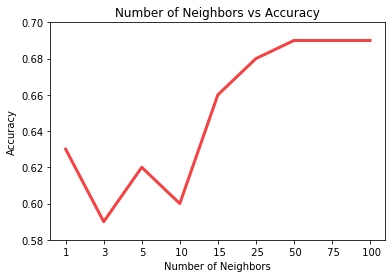

In [12]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

# Initialize Variables
num_neighbors_options = [1, 3, 5, 10, 15, 25, 50, 75, 100]
neighbors_labels = ['1',' 3',' 5',' 10',' 15',' 25',' 50',' 75',' 100']
results = []

# Either run new or use old data
if(toggle_calculations):
    #Calculate new results
    for num_neighbors in num_neighbors_options:
        clf = KNeighborsClassifier(n_neighbors=num_neighbors,weights='uniform')
        clf.fit(x_train, np.ravel(y_train,order='C'))
        
        y_pred = clf.predict(x_test)
        accuracy = sklearn.metrics.accuracy_score(y_test.values, y_pred)
        results.append(accuracy)
        print("num_neighbors: ", str(num_neighbors), "; accuracy: ", accuracy)

else:
    #Results obtained from a previous run; Allows quick adjustments of matplotlib parameters
    results = [0.63, 0.59, 0.62, 0.6, 0.66, 0.68, 0.69, 0.69, 0.69]

# Plot results
plt.plot(neighbors_labels, results, markerfacecolor='#f54242', markersize=12, color='#f54242', linewidth=3)
plt.ylim([0.58,0.7])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title("Number of Neighbors vs Accuracy")
plt.show()

**Conclusion**

As expected, the classifier did not perform well on such sparse data. It was interesting to see the clear climb in accuracy once the testing range hit 10. It almost follows a log function with 50 being the upper limit. Overall, the accuracy never reaches 70% though, so this classifier is not good for this task.


## Artificial Neural Network / Multi-Layer Perceptron
### Coding Implemented by Team Member: Chris Parks

**Approach**

The artificial neural network / multilayer perceptron is a very complex classifier. There are a large number of parameters that can be varied and tested upon, each adding exponentially to the permutations of possible runs. This can get quite strenuous on the runtime, and as such only a small number of parameters were tested.

The first parameter tested was the solver used (Limited-Memory Broyden Fletcher Goldfarb Shanno [LBFGS], Stochastic Gradient Descent [SGD], and Adam), activator functions (Identity, Logistic, Hyperbolic Tangent, and RELU), and the number of neurons in the hidden layer (10, 20, 30, and 40).




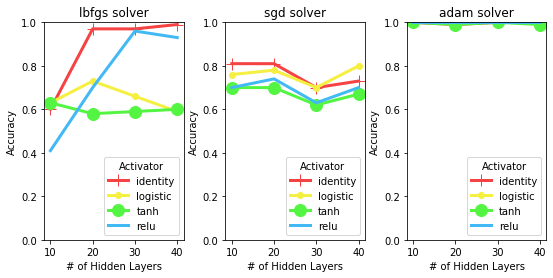

In [13]:
import sklearn
from sklearn.neural_network import MLPClassifier

# Initialize Variables
results = []
solvers = ['lbfgs', 'sgd', 'adam'] #sgd = stochastic gradient descent
activators = ['identity','logistic', 'tanh', 'relu'] #logistic = sigmoid
hidden_layer_sizes = [10,20,30,40]
hidden_layer_sizes_label = ['10','20','30','40']

# Start new calculation or use old results
if(toggle_calculations):
    #Calculate new results
    x=0
    for solver in solvers:
        results.append([])
        y=0
        for activator in activators:
            results[x].append([])
            z=0
            for hl_size in hidden_layer_sizes:
                results[x][y].append([])
                clf = MLPClassifier(solver=solver,alpha=1e-5,hidden_layer_sizes=(hl_size,),activation=activator,random_state=1)
                clf.fit(x_train, np.ravel(y_train,order='C'))
                y_pred = clf.predict(x_test)
                accuracy = sklearn.metrics.accuracy_score(y_test.values, y_pred)
                print("solver: ", solver, "; activator: ",activator,"; hidden_layer_size: ",str(hl_size),"; accuracy: ", accuracy)
                results[x][y][z] = accuracy
                z+=1
            y+=1
        x+=1

else:
    #Results obtained from a previous run; Allows quick adjustments of matplotlib parameters
    results = [[[0.6, 0.97, 0.97, 0.99], [0.63, 0.73, 0.66, 0.59], [0.63, 0.58, 0.59, 0.6], [0.41, 0.7, 0.96, 0.93]], [[0.81, 0.81, 0.7, 0.73], [0.76, 0.78, 0.7, 0.8], [0.7, 0.7, 0.62, 0.67], [0.7, 0.74, 0.63, 0.7]], [[1.0, 0.99, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 0.99, 1.0, 0.99], [1.0, 1.0, 1.0, 1.0]]]

# Plot the accuracies
markers = ['+','.','o',',']
colors = ['#f54242','#f5ef42','#54f542','#42b9f5']

plt.figure(figsize=(9,4))
for a in range(0,3):
    ax = plt.subplot(131 + a)
    ax.set_xlabel('# of Hidden Layers')
    ax.set_ylabel('Accuracy')
    for b in range(0,4):
        plt.plot( hidden_layer_sizes_label, results[a][b], marker=markers[b], markerfacecolor=colors[b], markersize=12, color=colors[b], linewidth=3)
        plt.ylim([0.0,1.0])
        
    plt.legend(activators,loc='lower right',title='Activator')
    plt.title(solvers[a] + " solver")
plt.subplots_adjust(wspace=0.3)
plt.show()

**Conclusion**

The solvers chosen had the largest impact on the accuracy of each run. While the activator functions did drastically change the results under the LDFGS solver, they didn't have too much of an impact anywhere else. The SGD solver performed adequately with accuracy ranging from 60 - 80%. However, the Adam solver performed at 100% accuracy regardless of the activator used or the number of hidden layers.

As a whole, the Adam solver in the ANN is the best suited classifier for this task.

## Ensemble Methods
### Coding Implemented by Team Member: Chris Parks

**Approach**

The ensemble classifiers start by gathering multiple weak classification predictions. Then they aggregate them to form one stronger classification prediction. There are several types of ensemble methods to choose from. Here two are tested: Bagging and AdaBoost.

#### *Bagging*

Bagging randomly collects a subset of the given dataset and uses a specified estimator on this subset to form a weak prediction. It keeps doing this (the subset taken is put back in the pool) until it aggregates the collection of weak predictions into a strong one.

The parameters used to test were: the number of estimators to use (2, 4, 6) and the percentage of samples used for the subsets (20%, 30%, 40%, 50%).


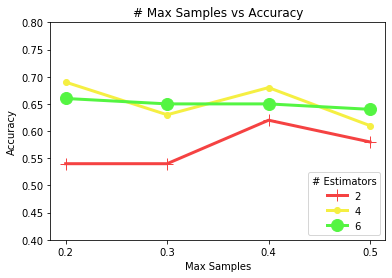

In [14]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# Initialize Variables
results = []
num_estimators_options = [2, 4, 6]
est_labels = ['2','4','6']
max_samples_options = [0.2, 0.3, 0.4, 0.5]
samples_labels = ['0.2','0.3','0.4','0.5']

# Either run new calculations or use the old results
if(toggle_calculations):
    #Calculate new results
    x=0
    for num_estimators in num_estimators_options:
        results.append([])
        for max_samples in max_samples_options:
            clf = BaggingClassifier(base_estimator=KNeighborsClassifier(),max_samples=max_samples, max_features=0.75,n_estimators=num_estimators)
            clf.fit(x_train, np.ravel(y_train,order='C'))
            y_pred = clf.predict(x_test)
            accuracy = sklearn.metrics.accuracy_score(y_test.values, y_pred)
            print("max_samples: ", str(max_samples), "; num_estimators: ", str(num_estimators)," accuracy: ", accuracy)
            results[x].append(accuracy)
        x+=1

else:
    #Results obtained from a previous run; Allows quick adjustments of matplotlib parameters
    results = [[0.54, 0.54, 0.62, 0.58], [0.69, 0.63, 0.68, 0.61], [0.66,0.65,0.65,0.64]]

# Plot the accuracies
markers = ['+','.','o',',']
colors = ['#f54242','#f5ef42','#54f542','#42b9f5']

for a in range(0,3):
    plt.plot(samples_labels, results[a],marker=markers[a], markerfacecolor=colors[a], markersize=12, color=colors[a], linewidth=3)
    plt.ylim([0.4,0.8])
plt.xlabel('Max Samples')
plt.ylabel('Accuracy')
plt.legend(est_labels,loc='lower right',title='# Estimators')
plt.title("# Max Samples vs Accuracy")
plt.show()

#### *AdaBoost*

AdaBoost works on the entire dataset and iterates over it a number of times. The estimators are changed after each iteration in order to attempt to correctly classify data that was misclassified in the previous iteration. 

The parameter chosen for testing was the number of estimators (10, 25, 50, 100, 150, 200).

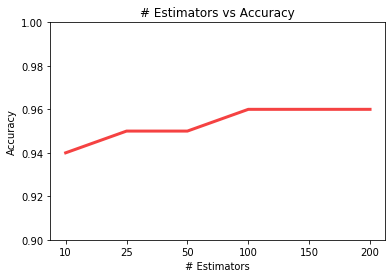

In [15]:
import sklearn
from sklearn.ensemble import AdaBoostClassifier

# Initialize Variables
results = []
num_estimators_options = [10, 25, 50, 100, 150, 200]
est_labels = ['10','25','50','100','150','200']

# Either run new calculations or use old results
if(toggle_calculations):
    #Calculate new results
    for n_estimators in num_estimators_options:
        clf = AdaBoostClassifier(n_estimators=n_estimators)
        clf.fit(x_train, np.ravel(y_train,order='C'))
        y_pred = clf.predict(x_test)
        accuracy = sklearn.metrics.accuracy_score(y_test.values, y_pred)
        results.append(accuracy)
        print("num_estimators: ", str(n_estimators), " accuracy: ", accuracy)

else:
    #Results obtained from a previous run; Allows quick adjustments of matplotlib parameters
    results = [0.94,0.95,0.95,0.96,0.96,0.96]

# Plot the accuracies
plt.plot(est_labels, results, markerfacecolor='#f54242', markersize=12, color='#f54242', linewidth=3) #identity
plt.ylim([0.9,1.0])
plt.xlabel('# Estimators')
plt.ylabel('Accuracy')
plt.title("# Estimators vs Accuracy")
plt.show()

**Conclusion**

The ensemble methods are a fascinating type of classifier, and have the potential to be quite powerful tools. In this case, the bagging method was not very successful, with an accuracy range of 54 - 69%. This could have been due to memory limitations that caused for a limited number of estimator options. More likely, however, it was due to the specified estimator being the nearest neighbor classifier (which was shown to be ineffective on this dataset previously).

The AdaBoost method, on the other hand, was a good classifier ranging in accuracy from 94-96%. There is still room for growth too by giving higher numbers of estimators to the classifier.


# Task 3: Exploring Used Auto Purchase Dataset

### Purpose:

The purpose of this task is to take a given dataset (the is incredibly large and formatted horrendously) and extrapolate patterns or information from it. Since this goal is open-ended, each team member used a different method of their choice to try to find correlations between differing fields within the dataset.

## Decision Tree Hypothesis Testing
### Coding Implemented by Team Member: Ian Vanderhoff

### **Approach**

#### *Hypothesis*

The goal for the decision tree hypothesis testing was to see if a correlation could be found between customer information and the vehicle type they bought. The hypothesis is that there will be a positive correlation between at least one attribute and type of vehicle bought.

#### *Data Preprocessing*

The dataset was given in a massive csv format file. There was a plethora of null values and zero values, and at parts it seemed the data was supposed to be scaled differently between entries. So the data preprocessing needed to reformat the data into a data frame, remove the empty entries, and then filter it down to just the entries that were being used to test the hypothesis. These entries chosen were:

* BehaviorBank: Internet/Online Subscriber
* BehaviorBank: Donates to Environmental Causes
* BehaviorBank: Interest in Foreign Travel
* BehaviorBank: Interest in Automotive
* BehaviorBank: Interest in Reading
* BehaviorBank: Interest in Travel
* BehaviorBank: Cat Enthusiast
* BehaviorBank: Interest in Domestic Travel
* MOR Bank Religious Contributor
* MOR Bank - Upscale Merch Buyer
* MOR Bank Do-It-Yourselfers
* MOR Bank Male Sports Magazine
* Ethnic Insight - Experian Group Code - Use this for group
* Rural Urban County Size Code
* Dwelling Type
* Home Heat Indicator
* Home Fireplaces
* Home Property Indicator
* Person Education
* Gender Code
* Presence of E-mail
* Homeowner Probability Model

To deal with categorical values, they were transformed into numerical values assigned based on what their possible categorical values could be. The dataset is very sparse, and all nan values were replaced with zero values. The attribute being tested was put into its own data frame for the purpose of fitting into the decision tree classifier, and the first 7000 records were chosen to be training data while the remaining 2999 were testing data for the prediction.

Note: See task3_format_data file for the functions used to format the data (implemented by Ian Vanderhoff).

#### *Results From Hand-Picked Attributes*

Much like with the decision tree classification in Task 1, parameters were tuned and tested to attempt to gain the best results. The parameters tested were: maximum depth (1-40), minimum sample split (2-20), and max feature value (default, full number, sqrt, and log base 2 of the total number of features in the tree).

The accuracy scores were taken from these trees on the testing data. The accuracies ranged from 45 - 55%, which is just like guessing, implying that the correlation between the original values in the hypothesis are very weak.


In [16]:
import pandas
import graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

from task3_format_data import auto_csv_to_df, reformat_auto_data_vals

pandas.options.mode.chained_assignment = None  # default='warn'

USED_AUTO_DATA_PATH = "/content/UsedAutoRELEVATEfirst10000-noLatLong.csv"

# Format data
auto_df = auto_csv_to_df(USED_AUTO_DATA_PATH)
auto_df = reformat_auto_data_vals(auto_df)

# keep only selected attributes
x_data = auto_df.loc[:, (
    'BehaviorBank: Internet/Online Subscriber',
    'BehaviorBank: Donates to Environmental Causes',
    'MOR Bank Religious Contributor',
    'Rural Urban County Size Code',
    'BehaviorBank: Interest in Foreign Travel',
    'Ethnic Insight - Experian Group Code - Use this for group',
    'BehaviorBank: Interest in Automotive',
    'MOR Bank - Upscale Merch Buyer',
    'Dwelling Type',
    'MOR Bank Do-It-Yourselfers',
    'MOR Bank Male Sports Magazine',
    'BehaviorBank: Interest in Reading',
    'BehaviorBank: Interest in Travel',
    'Home Heat Indicator',
    'BehaviorBank: Cat Enthusiast',
    'BehaviorBank: Interest in Domestic Travel',
    'Home Fireplaces',
    'Home Property Indicator',
    'Person Education',
    'Gender Code',
    'Presence of E-mail',
    'Homeowner Probability Model')]

# replace string codes with numerical values
x_data.loc[:, 'BehaviorBank: Internet/Online Subscriber'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Donates to Environmental Causes'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Foreign Travel'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Automotive'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Reading'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Travel'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Cat Enthusiast'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Domestic Travel'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'Presence of E-mail'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'Dwelling Type'].replace({'A': 1, 'M': 2, 'P': 3, 'S': 4}, value=None, inplace=True)
x_data.loc[:, 'Gender Code'].replace({'B': 1, 'F': 2, 'M': 3, 'U': 4, 'A': 5}, value=None, inplace=True)
x_data.loc[:, 'Homeowner Probability Model'].replace({0: 1, 101: 2, 102: 3}, value=None, inplace=True)

# fill nan values with -1
x_data.fillna(0, inplace=True)

y_label = auto_df[['Vehicle Type']]
y_label['Vehicle Type'].replace({'CAR': 1, 'SUV': 2, 'TRUCK': 3, 'VAN': 4}, value=None, inplace=True)

x_data_training = x_data.iloc[1:7000]
x_data_testing = x_data.iloc[7001:]

y_label_training = y_label.iloc[1:7000]
y_label_testing = y_label.iloc[7001:]

trials_list = []

max_acc_val = 0

for depth in range(1, 40):
    for min_samp in range(2, 20):
        for max_feat in [None, 'auto', 'sqrt', 'log2']:
            clf = tree.DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=min_samp,
                max_features=max_feat,
            )
            clf = clf.fit(x_data_training, y_label_training)

            depth = clf.get_depth()

            y_pred = clf.predict(x_data_testing)
            accuracy = accuracy_score(y_label_testing.values, y_pred)

            if accuracy > max_acc_val:
                max_acc_val = accuracy
                max_clf = clf

            trials_list.append(
                {
                    'accuracy': accuracy,
                    'max_depth': depth,
                    'min_samples_split': min_samp,
                    'max_features': max_feat
                }
            )

trials_list = sorted(trials_list, key=lambda i: i['accuracy'])
trial_max_acc = trials_list[-1]
trial_min_acc = trials_list[0]
trials_count = len(trials_list)

print(f"number of trials: {trials_count}\n")
print(f"min accuracy trial:\naccuracy: {trial_min_acc['accuracy']}\nmax_depth: {trial_min_acc['max_depth']}\nmin_samples_split: {trial_min_acc['min_samples_split']}\nmax_features: {trial_min_acc['max_features']}\n")
print(f"max accuracy trial:\naccuracy: {trial_max_acc['accuracy']}\nmax_depth: {trial_max_acc['max_depth']}\nmin_samples_split: {trial_max_acc['min_samples_split']}\nmax_features: {trial_max_acc['max_features']}\n\n")

y_pred = max_clf.predict(x_data_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)


number of trials: 2808

min accuracy trial:
accuracy: 0.4696464309539693
max_depth: 27
min_samples_split: 2
max_features: None

max accuracy trial:
accuracy: 0.5510340226817878
max_depth: 6
min_samples_split: 5
max_features: sqrt




#### *Accuracy Check with Bad Data*

Because the accuracy ratios were so low in the initial test. A purposefully bad check was implemented. This decision tree classifier would guess ‘Car’ for every label prediction in the testing data. This proved to be on the high end of the original classification, coming out with 55% accuracy ratio. This meant that the hand-selected attributes were worse in the case of decision tree classification than just guessing ‘Car’. This means that there was zero correlation between those attributes and the vehicle type a customer bought.


In [17]:
"""
Test on a zero array of the same dimensions as the regular training data array.
"""

num_rows = auto_df.shape[0]
zeros = np.zeros(shape=(num_rows, 22))
zdf = pandas.DataFrame(zeros)
x_data_blank = zdf

x_data_training_blank = x_data_blank[1:7000]

clf_blank = tree.DecisionTreeClassifier()
clf_blank = clf_blank.fit(x_data_training_blank, y_label_training)

depth = clf_blank.get_depth()

y_pred = clf_blank.predict(x_data_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}\n")

depth of tree: 0
prediction accuracy: 0.5470313542361575



#### *Attributes with Less Than 50% NAN Values*

In order to prune the data and attempt to get higher accuracy all attributes with less than 50% NaN values were selected to be in the training and testing datasets. In order to test customer behavioral traits, all attributes relating to the vehicle purchased were removed.

This resulted in a drop of accuracy by the decision tree classifier to around 35%.


In [18]:
from task3_format_data import df_perc_nan_less_than, categorical_to_numerical, column_percent_nan

auto_df = auto_csv_to_df(USED_AUTO_DATA_PATH)
auto_df = reformat_auto_data_vals(auto_df)

# keep only columns with less than 50% nans
filtered_df = df_perc_nan_less_than(auto_df, 0.5)

# convert categorical columns to numerical values
filtered_df = categorical_to_numerical(filtered_df)

names = list(filtered_df.columns)

x_data = filtered_df
x_data = x_data.drop(
    ['Acct#',
     'Model 1',
     'Engine Cylinders',
     'Vehicle 1 Trim',
     'Engine Size',
     'Drive Type',
     'Fuel Type',
     'Make 1',
     'Engine Block',
     'Year 1',
     'Vehicle Type'
     ], axis=1
)
y_label = filtered_df[['Vehicle Type']]

x_data_training = x_data.iloc[1:7000]
x_data_testing = x_data.iloc[7001:]

y_label_training = y_label.iloc[1:7000]
y_label_testing = y_label.iloc[7001:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_data_training, y_label_training)

depth = clf.get_depth()

y_pred = clf.predict(x_data_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}")
print(f"number of features: {clf.n_features_}")

depth of tree: 53
prediction accuracy: 0.37658438959306206
number of features: 195


In an attempt to further improve the accuracy, feature selection was implemented in the training set with the threshold for feature importance being greater than 0.1. Now, the number of features in the set was 2.

This increased the accuracy to about 40%, which was better than the previous run but still worse than the hand-selected attributes.


In [19]:
feature_importance = clf.feature_importances_
important_features_cols = []
for i, v in enumerate(list(feature_importance)):
    important_features_cols.append((i, v))
important_features_cols.sort(key=lambda x: x[1], reverse=True)

names = list(x_data_testing.columns)
important_features_cols = [i for i in important_features_cols if i[1] > 0.1]

names_filtered = []
for i in important_features_cols:
    names_filtered.append(names[i[0]])

x_data_2 = x_data[names_filtered]
x_data_2_training = x_data_2.iloc[1:7000]
x_data_2_testing = x_data_2.iloc[7001:]

clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(x_data_2_training, y_label_training)

depth = clf2.get_depth()

y_pred = clf2.predict(x_data_2_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}")
print(f"number of features: {clf2.n_features_}")

depth of tree: 36
prediction accuracy: 0.3749166110740494
number of features: 3


It was clear that the behavioral correlations weren’t high enough within the dataset, so vehicle attributes were put back in (such as engine size and engine cylinders). Without feature selection, 201 features were in this tree.

This resulted in accuracy around 70%, which was a vast improvement, but also should be expected since now the car information should have strong correlations.


In [20]:
x_data_3 = filtered_df
x_data_3 = x_data_3.drop(
    ['Acct#',
     'Model 1',
     'Vehicle 1 Trim',
     'Make 1',
     'Vehicle Type'
     ], axis=1
)

x_data_3_training = x_data_3.iloc[1:7000]
x_data_3_testing = x_data_3.iloc[7001:]

clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(x_data_3_training, y_label_training)

depth = clf3.get_depth()

y_pred = clf3.predict(x_data_3_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}")
print(f"number of features: {clf3.n_features_}")

depth of tree: 32
prediction accuracy: 0.6967978652434956
number of features: 201


The same experiment was run again allowing only attributes with less than 40% NaN values. The features that were in the tree were:

* Carrier Route
* Transaction Date
* Engine Size
* Engine Cylinders
* Drive Type
* Fuel Type
* Delivery Point Check Digit
* Phone DNC Status
* Engine Block
* Year 1
* Delivery Point
* Gender Code
* Wireless Phone DNC Status

The accuracy was around mid 70's%, which is an even further improvement.

In [21]:
auto_df = auto_csv_to_df(USED_AUTO_DATA_PATH)
auto_df = reformat_auto_data_vals(auto_df)

# keep only columns with less than 40% nans
filtered_df = df_perc_nan_less_than(auto_df, 0.4)

# convert categorical columns to numerical values
filtered_df = categorical_to_numerical(filtered_df)

x_data = filtered_df
x_data = x_data.drop(
    ['Acct#',
     'Model 1',
     'Vehicle 1 Trim',
     'Make 1',
     'Vehicle Type'
     ], axis=1
)
y_label = filtered_df[['Vehicle Type']]

x_data_training = x_data.iloc[1:7000]
x_data_testing = x_data.iloc[7001:]

y_label_training = y_label.iloc[1:7000]
y_label_testing = y_label.iloc[7001:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_data_training, y_label_training)

depth = clf.get_depth()

y_pred = clf.predict(x_data_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}")
print(f"number of features: {clf.n_features_}")

depth of tree: 25
prediction accuracy: 0.71447631754503
number of features: 13


### **Conclusion**

The conclusion of these tests is that there is no correlation within this dataset between behavioral traits of customers and the vehicle type they bough. There were correlations between vehicle information, which is to be expected as they can only build a vehicle type with so many options. The dataset itself is very sparse and has inconsistencies within it that could attribute to this total lack of correlation.

## Apriori Algorithm Pattern Recognition
### Coding Implemented by Team Member: Chris Parks



### **Approach**

#### *Hypothesis*

The goal for the Apriori pattern recognition is to discover hidden relationships between hand-selected customer attributes and create distinct subgroups that the customers could be assigned to. The Apriori algorithm was selected due to the fact that it can search all permutations of the attributes and generate association rules.

#### *Data Preprocessing*

The following fields were hand-selected based on relevance to the customer:

* BehaviorBank: Cat Enthusiast
* BehaviorBank: Computer Owner
* BehaviorBank: Contributes to Charities
* BehaviorBank: Cruise Enthusiasts
* BehaviorBank: Dog Enthusiasts
* BehaviorBank: Donates to Environmental Causes
* BehaviorBank: Home Decorating/Furnishing
* BehaviorBank: Interest in Automotive
* BehaviorBank: Interest in Domestic Travel
* BehaviorBank: Interest in Fitness
* BehaviorBank: Interest in Foreign Travel
* BehaviorBank: Interest in Gardening
* BehaviorBank: Interest in Gourmet Cooking
* BehaviorBank: Interest in Reading
* BehaviorBank: Interest in Sports
* BehaviorBank: Interest in the Outdoors
* BehaviorBank: Interest in Travel
* BehaviorBank: Internet/Online Subscriber
* BehaviorBank: Invest in Mutual Funds/Annuities
* BehaviorBank: Investor
* BehaviorBank: Pet Enthusiast
* BehaviorBank: Presence of Credit Card
* BehaviorBank: Presence of Premium Credit Card
* BehaviorBank: Purchase via On line
* BehaviorBank: Purchased Through the Mail
* Drive Type
* Dwelling Unit Size
* Engine Size
* Estimated Current Home Value
* Estimated Equity - Amount in thousands
* Estimated Mortgage Amount - Amount in thousands
* Ethnic Insight - Alphabetic Religion Code
* Gender Code
* Person Exact Age
* Person Marital Status
* Presence of Children Type
* Presence of E-mail
* Vehicle Type
* Year 1

The data is formatted by taking each field as its own data frame and converting continuous fields into discrete fields. The reason for this is so that the Apriori algorithm can run over the data successfully (as it treats all data as discrete anyways). 

The BehaviorBank fields are defaulted to no if they are left empty.

Due to time constraints, only 2500 records are randomly selected from the dataset and used by the Apriori algorithm to generate association rules.


#### *Results*

##### **WARNING: THIS ALGORITHM WILL TAKE A LONG TIME TO COMPLETE.** 

<u>When prompted, type 'yes' to proceed with the calculations or 'no' to print an example ruleset from a previous run. Using the previous run will not take much time as the algorithm does not have to run.</u>

In [22]:
!pip install apyori

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from apyori import apriori
import random

path = "/content/data_nochanges.csv"
numLines = 2500

minsup = 0.25
mincon = 0.3
minlift = 1.8
maxlen = 5

useful_columns = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,93,96,99,101,103,109,112,124,255,257,264,265,277,279]
useless_labels = ['unknown']

labels = []
data = []
data_index = 0

typed_answer = False

print("Perform calculations? (Type 'yes' to proceed, type 'no' to print a previous run's results and save time)")

while(not typed_answer):
    answer = input().lower()
    if(answer == 'yes' or answer == 'no'):
        typed_answer = True

if(answer == 'yes'):
    with open(path,newline='') as csvfile:
        spamreader = csv.reader(csvfile,delimiter=',',quotechar='|')
        for i, row in enumerate(spamreader):
            if(i == 0):
                for j,x in enumerate(row):
                    if(j in useful_columns):
                        s = x
                        s = s.replace('BehaviorBank: ','')
                        labels.append(s)
            else:
                data.append([])
                for j,x in enumerate(row):
                    if(j in useful_columns):
                        data[data_index].append(x)
                data_index+=1
    all_values = []
    d_dwelling = {'A':'1','B':'2','C':'3','D':'4','E':'5-9','F':'10-19','G':'20-49','H':'50-100','I':'101+'}
    d_religion = {'B':'Buddhist','C':'Catholic','E':'Ethiopian Orthodox','G':'Greek Orthodox','H':'Hindu','I':'Muslim','J':'Jewish','K':'Sikh','L':'Lutheran','M':'Mormon','O':'Eastern Orthodox','P':'Protestant','S':'Shinto','X':'unknown'}
    d_married = {'5S':'S', '1M':'M', '5U':'unknown', '0U':'unknown', '5M':'M'}
    for i,x in enumerate(labels):
        for j,y in enumerate(data):
            if(i == 26):
                if(y[i] in d_dwelling):
                    data[j][i] = d_dwelling[y[i]]
                else:
                    data[j][i] = "unknown"
            elif(i == 34):
                if(y[i] in d_married):
                    data[j][i] = d_married[y[i]]
                else:
                    data[j][i] = "unknown"
            elif((i >= 0 and i <= 24) or i == 35):
                if(y[i] == 'U'):
                    data[j][i] = 'unknown'
                elif(y[i] == ''):
                    data[j][i] = "unknown"
            elif(i == 36):
                if(y[i] == ''):
                    data[j][i] = 'N'
            elif(i == 27):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) * 1,0) / 1
            elif(i == 31):
                if(y[i] in d_religion):
                    data[j][i] = d_religion[y[i]]
                else:
                    data[j][i] = "unknown"
            elif(i == 32):
                if(y[i] == "U"):
                    data[j][i] = "unknown"
            elif(i == 33 or i == 38):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) / 10,0) * 10
            elif(i == 28):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) / 1000000,0) * 1000000
            elif(i == 29):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) / 200,0) * 200
            elif(i == 30):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) / 200,0) * 200
            elif(y[i] == ''):
                data[j][i] = "unknown"
    for i,x in enumerate(labels):
        arr = []
        for j,y in enumerate(data):
            arr.append(y[i])
        all_values.append(list(set(arr)))
    #records = data
    for i,x in enumerate(data):
        for j, y in enumerate(x):
            data[i][j] = labels[j] + " = " + str(x[j])

    random.shuffle(data)
    data = data[:numLines]
    
    print("Done with append: " + str(len(data)) + " records")
    print("Calculating: Please wait. Prepare for a long wait time...")
    #int("Possible values:")
    #for x in all_values:
    #    print(x)
    
    association_rules = apriori(data, min_support=minsup, min_confidence=mincon, min_lift=minlift, max_length=maxlen)
    association_results = list(association_rules)

    print("Rules:")
    for item in association_results:
        cont = True
        for x in useless_labels:
            for y in item[0]:
                if(y.count(x)):
                    cont = False
                    break
            if(cont == False):
                break
        if(cont):
            print(str(list(item[2][0][0])) + " -> " + str(list(item[2][0][1])) + " (confidence = " + str(round(item[2][0][2],3)) + ", lift = " + str(round(item[2][0][3],3)) + ", support = " + str(round(item[1],3)) + ")")
elif(answer == 'no'):
    res = open("/content/q3_results_18.txt")
    print(res.read())
    res.close()

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=814844f8dd88f4b4beb15e835a9ce29a07f34b46fc3da43bf755f39e4384f20f
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori
Perform calculations? (Type 'yes' to proceed, type 'no' to print a previous run's results and save time)
no
Parameters:
Minimum Support: 0.25
Minimum Confidence: 0.3
Minimum Lift: 1.8
Maximum Set Size: 5

['Computer Owner = Y'] -> ['Dwelling Unit Size = 1'] (confidence = 0.877, lift = 1.99, support = 0.334)
['Computer Owner = Y'] -> ['Estimated Current Home Value = 0.0'] (confidence = 0.916, lift = 1.862, support = 0.349)
['Computer Owner = Y'] -> ['Internet/Online Subscriber = Y'] (confidence = 0.937, lift = 2.623, support = 0.357)
['Computer Owner = Y'] -> ['Person Marital Status = M'] (confidence = 0.694, lift = 2.074, support = 0.264)
['Computer Owner = Y'] -> ['Presence of Credit Card = Y'] (confidence 

### **Conclusion**
Based on the rules generated, it is clear that there are strong correlation between all of the BehaviorBank fields, however that is most likely due to the fact that if a customer answered one survey question they probably answered the others. All those rules tell us is that the majority of people who did one question on the survey were very likely to do another one as well.

The sparseness of the dataset can be attributed to the low confidence of many of the other rules as well. There were some rules that seemed to have fairly adequate confidence such as:

\['Person Marital Status = M'\] -> \[Purchased Through the Mail = Y'\] (confidence = 0.772, lift = 2.085, support = 0.258)

But most of the rules generated are either useless or redundant. Overall, the rules generated simply tell us that if a customer took the survey, they likely filled out the whole survey.



## Linear Regression
### Coding Implemented by Team Member: Cameron Howard

### **Approach**

#### *Hypothesis*

The goal for the linear regression test was to see if any positive correlations could be visualized on a graph between two attributes from the dataset. The attributes were hand-selected, and the code is easily customizable so that different attributes can be tested.

#### *Data Preprocessing*

The data preprocessing required the data to be formatted in a way that the scikit-learn’s linear regression could run the fit and prediction over it. The formatting functions were used to put the data into a data frame, then reformat the values, then change the categorical values to numerical values. 
 
Then the hand selected attributes were extracted from the data frame into their own array of both of the pair and all NaN and zero values were dropped. This had to be done in this step so that the individual arrays afterwards would contain no zero values, nor NaN values, and still maintain the same shape. Then the pair was split into an x and y array and was ready to be ran through the regression.

The pairs of attributes I chose to test were:

* Year 1, Vehicle Type
* Home Base Square Footage, Home Land Value
* Estimated Current Home Value, Home Land Square Footage
* Home Total Rooms, BehaviorBank: Cat Enthusiast


#### *Results*

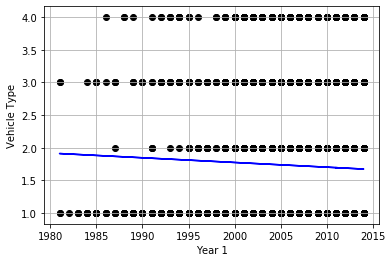

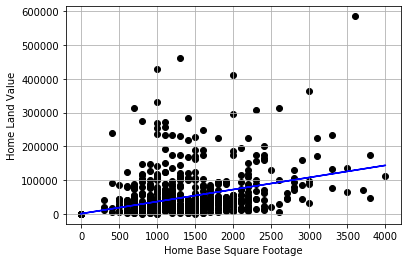

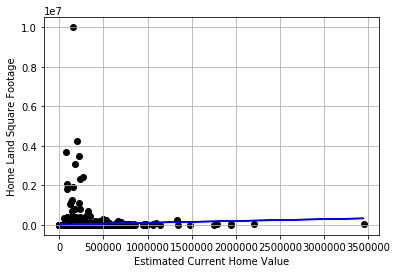

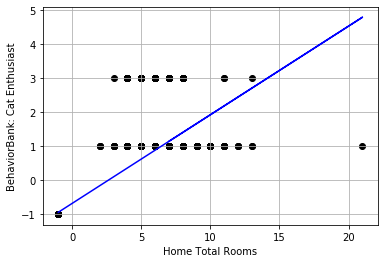

In [23]:
from task3_format_data import auto_csv_to_df, reformat_auto_data_vals, categorical_to_numerical
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

USED_AUTO_DATA_PATH = "/content/UsedAutoRELEVATEfirst10000-noLatLong.csv"


def extract_names(xn, yn, dframe):
    comp_df = dframe[[xn, yn]]
    comp_df = comp_df.dropna()
    comp_df = comp_df[(comp_df != 0).all(1)]

    xarr = comp_df[xn].to_numpy()
    yarr = comp_df[yn].to_numpy()

    return xarr, yarr


def run_and_plot_regression(x, y, x_name, y_name):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

    reg = LinearRegression()
    reg.fit(x_train.reshape(-1, 1), y_train)
    y_pred = reg.predict(x_test.reshape(-1, 1))

    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_test, y_pred, color='blue')
    plt.xticks()
    plt.yticks()
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.grid()
    plt.show()


if __name__ == '__main__':
    df = auto_csv_to_df(USED_AUTO_DATA_PATH)
    df = reformat_auto_data_vals(df)
    df = categorical_to_numerical(df)

    x_names = ['Year 1', 'Home Base Square Footage', 'Estimated Current Home Value', 'Home Total Rooms']
    y_names = ['Vehicle Type', 'Home Land Value', 'Home Land Square Footage', 'BehaviorBank: Cat Enthusiast']

    for i in range(len(x_names)):
        x, y = extract_names(x_names[i], y_names[i], df)

        run_and_plot_regression(x, y, x_names[i], y_names[i])

### **Conclusion**

Linear Regression is meant to use two continuous variables. Two of the examples used use a discrete variable. This demonstrates a failure of linear regression, but shows how the data could be examined as a clustering problem.
 
The first plot (Vehicle Type vs. Vehicle Year) is an example of one that doesn't work with linear regression because vehicle type isn't continuous as there are only 4 types. From the graph you can see that this could work as a clustering problem, although it still wouldn't be that informative. 
 
The second plot (Home Land Value vs Home Base Square Footage) is actually probably the best example of how it should work. You can kind of see that there is a positive correlation (as would be expected), but there are also a lot of outliers that could be skewing the data.
 
The third plot (Home Land Square Footage vs Estimated Current Home Value) somewhat works, but with massive outliers crushing the correlation. Also, it seems that a good portion of data is going the wrong way (climbing the Y while low on the X) This could be due to inconsistencies within the dataset. By looking at the dataset manually, it looks like some of the values of square footage are meant to be scaled by 1000 while others are meant to be scaled by 100.
 
The fourth plot (BehaviorBank: Cat Enthusiast vs Home Total Rooms) doesn't work at all because, again, one of the variables has only 2 options. This test was run to see if there was any correlation to cat enthusiasts having more or less rooms in their house. This is again better suited as a clustering problem, but once again it wouldn't be very informative.
 
Overall, the dataset seems to be full of inconsistencies and poor correlations.


# List of Codes/Documents Submitted

1. label_training.txt - The true labels of the Task 1 testing data
2. testing.txt - Task 1 testing data
3. training.txt - Task 1 training data
4. UsedAutoRELEVATEfirst10000-noLatLong.csv - Auto data for Task 3
5. task1_format_data.py - Ian Vanderhoff's format data program for Task 1
6. task3_format_data.py - Ian Vanderhoff's format data program for Task 3
7. README.txt - A readme file further describing what is being submitted
8. Report.ipynb - The python notebook of the entire Report, runnable in Google Colab

# References

[1] Dangare, Chaitrali S., and Sulabha S. Apte. "Improved study of heart disease prediction system using data mining classification techniques." International Journal of Computer Applications 47.10 (2012): 44-48.

[2] Kumari, Milan, and Sunila Godara. "Comparative study of data mining classification methods in cardiovascular disease prediction 1." (2011).

[3] Zhang, Zaifang, Hui Cheng, and Xuening Chu. "Aided analysis for quality function deployment with an Apriori-based data mining approach." International Journal of Computer Integrated Manufacturing 23.7 (2010): 673-686.

[4] McCullough, B. D., Taha Mokfi, and Mahsa Almaeenejad. "On the accuracy of linear regression routines in some data mining packages." Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery 9.3 (2019): e1279.